In [1]:
import numpy as np

def cartesian(arrays, out=None):
    """
    Source: https://stackoverflow.com/a/1235363
    Generate a Cartesian product of input arrays.

    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the Cartesian product of.
    out : ndarray
        Array to place the Cartesian product in.

    Returns
    -------
    out : ndarray
        2-D array of shape (M, len(arrays)) containing Cartesian products
        formed of input arrays.

    Examples
    --------
    >>> cartesian(([1, 2, 3], [4, 5], [6, 7]))
    array([[1, 4, 6],
           [1, 4, 7],
           [1, 5, 6],
           [1, 5, 7],
           [2, 4, 6],
           [2, 4, 7],
           [2, 5, 6],
           [2, 5, 7],
           [3, 4, 6],
           [3, 4, 7],
           [3, 5, 6],
           [3, 5, 7]])

    """

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    #m = n / arrays[0].size
    m = int(n / arrays[0].size)
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m, 1:])
        for j in range(1, arrays[0].size):
        #for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m, 1:] = out[0:m, 1:]
    return out

<AxesSubplot:>

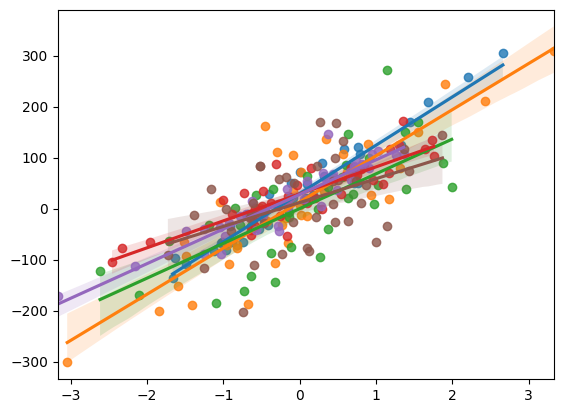

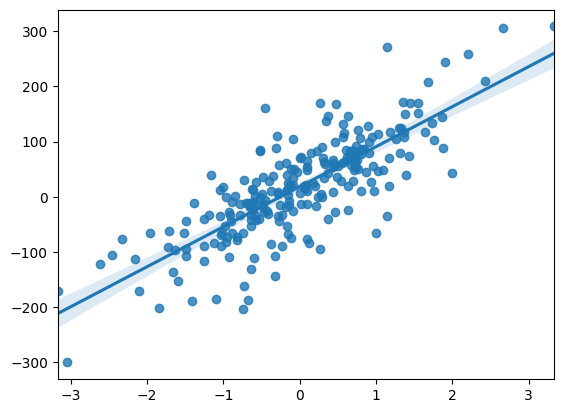

In [3]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import seaborn as sns

meaningful_groups = {"g1": [range(2)], "g2": [range(3)]}
# dummy_groups = {f"d{i}": [0,1] for i in range(1)}

n_features = 2
n_samples_per_group = 40
combinations = cartesian([v for v in meaningful_groups.values()])
X_list = []
y_list = []
for c in combinations:
    X, y = make_regression(n_samples=n_samples_per_group, n_features=n_features, noise=0.3)
    y +=  np.random.random() * np.random.randint(25,50, size=1)
    X_list.append(X)
    y_list.append(y)
    sns.regplot(x=X[:,0], y=y)

X_features = np.concatenate(X_list, axis=0)
X_groups = np.repeat(combinations, n_samples_per_group, axis=0)
X = np.concatenate([X_features, X_groups], axis=1)

y = np.concatenate(y_list)

plt.figure()
sns.regplot(x=X[:,0], y=y)

(1800, 1) (1800, 2)


<AxesSubplot:>

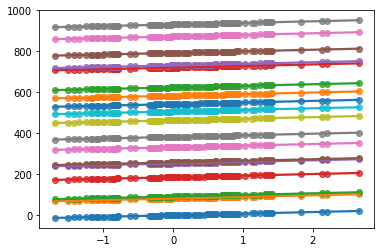

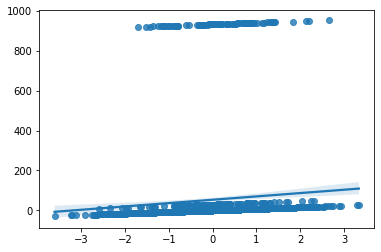

In [72]:
# from sklearn.datasets import make_regression
# import matplotlib.pyplot as plt
# import seaborn as sns

# meaningful_groups = {"g1": [0,1,2], "g2": [0,1,2,3,4,5]}
# dummy_groups = {f"d{i}": [0,1] for i in range(1)}

# n_features = 1
# n_samples_per_group = 100
# combinations = cartesian([v for v in meaningful_groups.values()])
# X_list = []
# y_list = []
# X, y = make_regression(n_samples=n_samples_per_group * len(combinations), n_features=n_features)
# start = 0
# for c in combinations:
#     y[start:(start+n_samples_per_group)] += np.random.random() * 100
#     start =+ n_samples_per_group
#     sns.regplot(x=X[start:(start+n_samples_per_group),0], y=y[start:(start+n_samples_per_group)])

# X_features = X
# X_groups = np.repeat(combinations, n_samples_per_group, axis=0)
# print(X.shape, X_groups.shape)
# X = np.concatenate([X_features, X_groups], axis=1)

# plt.figure()
# sns.regplot(x=X[:,0], y=y)

In [46]:
import pandas as pd
df_X = pd.DataFrame(X, columns=[f"f{i}" for i in range(n_features)] + list(meaningful_groups.keys()))
df = df_X.copy()
df["y"] = y
df.head()

c = df.filter(regex="g").columns
df[c] = df[c].astype(int)
df

,f0,f1,f2,g1,g2,y
0,0.243249,-0.197241,-0.917843,0,0,-24.429150
1,-1.934374,0.407243,0.045538,0,0,-77.081637
2,-0.177657,-0.741897,0.025230,0,0,-49.975185
3,0.426757,0.272591,0.965481,0,0,96.028671
4,-0.537562,1.307849,0.676162,0,0,96.788971
...,...,...,...,...,...,...
235,0.419638,-0.308989,0.239399,1,2,6.002933
236,1.362887,-0.092278,0.359158,1,2,48.086373
237,0.106374,1.627531,-0.611152,1,2,143.031671
238,0.122392,0.393264,0.500115,1,2,72.299513


In [47]:
df_original = df.copy()

In [7]:
df_dummy = df
for dum in [f"d{no}" for no in range(51)]:
    df_dummy[dum] = np.random.randint(0, 3, size=len(df))
    df_dummy[dum] = df_dummy[dum].astype(float)
df_dummy

,f0,f1,f2,g1,g2,y,d0,d1,d2,d3,...,d41,d42,d43,d44,d45,d46,d47,d48,d49,d50
0,0.978093,1.694343,1.243798,0,0,184.361595,1.0,2.0,0.0,0.0,...,1.0,1.0,0.0,1.0,2.0,0.0,1.0,2.0,0.0,1.0
1,1.120944,-0.345364,0.635893,0,0,130.412820,1.0,0.0,1.0,0.0,...,1.0,2.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0
2,2.052141,-0.605513,-1.856239,0,0,72.624591,0.0,0.0,1.0,1.0,...,2.0,1.0,2.0,2.0,2.0,1.0,1.0,0.0,1.0,0.0
3,-1.624955,1.462531,1.436290,0,0,5.143450,1.0,0.0,1.0,2.0,...,2.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0
4,-0.420958,1.256537,0.218367,0,0,28.455684,1.0,0.0,0.0,2.0,...,1.0,2.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,1.626119,0.694380,-0.518648,1,2,83.903216,1.0,2.0,1.0,0.0,...,2.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,2.0
236,-0.023616,0.108546,2.202741,1,2,100.905526,0.0,1.0,2.0,0.0,...,1.0,2.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
237,-1.299644,-0.856158,0.042499,1,2,-31.967700,0.0,0.0,1.0,0.0,...,1.0,2.0,0.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0
238,0.797493,-2.435574,1.473091,1,2,23.223257,0.0,2.0,2.0,0.0,...,0.0,2.0,1.0,0.0,0.0,1.0,2.0,2.0,0.0,2.0


In [48]:
def plot_loss(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range (1, len(loss) + 1)
    plt.plot(epochs, loss, 'y', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [49]:
import gc
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler

from lmmnn.nn import reg_nn_ohe_or_ignore, reg_nn_lmm, reg_nn_embed, reg_nn_rnn
from lmmnn.simulation import Count

import tensorflow.keras.backend as K

In [50]:
df.rename(columns={'f2': 't',
                   'g1': 'z0',
                   'g2': 'z1'}, inplace=True)
print(df.head())

         f0        f1         t  z0  z1          y
0  0.243249 -0.197241 -0.917843   0   0 -24.429150
1 -1.934374  0.407243  0.045538   0   0 -77.081637
2 -0.177657 -0.741897  0.025230   0   0 -49.975185
3  0.426757  0.272591  0.965481   0   0  96.028671
4 -0.537562  1.307849  0.676162   0   0  96.788971


In [51]:
# mode = 'slopes'
mode = 'intercepts'

batch_size = 100
epochs = 500
patience = 10
n_sig2bs = 3
n_sig2bs_spatial = 0
est_cors = []
n_neurons = [100,50,25,12]
activation = 'relu'
dropout = [0.2, 0.2, 0.2]
spatial_embedded_neurons = []
dist_matrix = None
q_spatial = None
n_cats = [len(df['z0'].unique()), len(df['z1'].unique())]
# n_cats = [len(df['z0'].unique()), len(df['z1'].unique()), len(df['z2'].unique()), len(df['z3'].unique())]

In [52]:
from sklearn.model_selection import train_test_split
X, y = df.drop('y', axis=1), df['y']
if mode == 'slopes':
    x_cols = [col for col in X.columns if col not in ['t','z0','z1','z2','z3']]
else:
    x_cols = [col for col in X.columns if col not in ['z0','z1','z2','z3']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)
scaler = StandardScaler()

X_train[x_cols] = scaler.fit_transform(X_train[x_cols]) #.values.reshape(-1,1))
X_test[x_cols]  = scaler.transform(X_test[x_cols]) #.values.reshape(-1,1))


Epoch 1/500
2/2 [==============================] - 1s 171ms/step - loss: 366806.3438 - val_loss: 61462.1367
Epoch 2/500
2/2 [==============================] - 0s 24ms/step - loss: 365938.4688 - val_loss: 61306.8789
Epoch 3/500
2/2 [==============================] - 0s 21ms/step - loss: 364882.9688 - val_loss: 61146.9258
Epoch 4/500
2/2 [==============================] - 0s 26ms/step - loss: 363903.0625 - val_loss: 60986.7812
Epoch 5/500
2/2 [==============================] - 0s 22ms/step - loss: 363056.4688 - val_loss: 60824.0430
Epoch 6/500
2/2 [==============================] - 0s 21ms/step - loss: 362215.2500 - val_loss: 60654.8945
Epoch 7/500
2/2 [==============================] - 0s 47ms/step - loss: 360998.7188 - val_loss: 60479.1914
Epoch 8/500
2/2 [==============================] - 0s 26ms/step - loss: 360269.3438 - val_loss: 60297.8281
Epoch 9/500
2/2 [==============================] - 0s 22ms/step - loss: 358966.8438 - val_loss: 60109.1523
Epoch 10/500
2/2 [==================

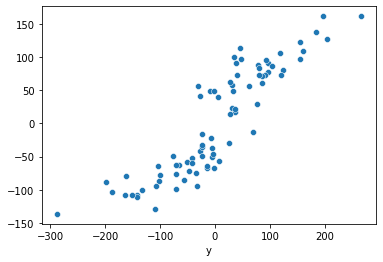

 finished lmm, mse: 2148.7946


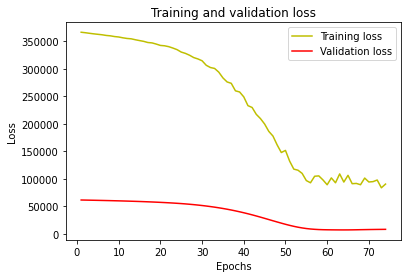

In [53]:
def reg_nn(X_train, X_test, y_train, y_test, n_cats, batch=batch_size, epochs=epochs, patience=patience, reg_type='ohe', verbose=False):
    
    start = time.time()
    if reg_type == 'lmm':
        model, history, y_pred, sigmas, _, _, n_epochs = reg_nn_lmm(X_train, X_test, y_train, y_test, n_cats, q_spatial, x_cols, batch, epochs, patience,
                                                 n_neurons, dropout, activation,
                                                 mode=mode, n_sig2bs=n_sig2bs, n_sig2bs_spatial=n_sig2bs_spatial,
                                                 est_cors=est_cors, dist_matrix=dist_matrix,
                                                 spatial_embed_neurons=spatial_embedded_neurons, verbose=verbose, log_params=False)
    else:
        raise ValueError(reg_type + 'is an unknown reg_type')
    end = time.time()
    gc.collect()
    K.clear_session()
    mse = np.mean((y_pred - y_test)**2)
    sns.scatterplot(x=y_test, y=y_pred)
    plt.show()
    
    return mse, sigmas, n_epochs, end - start, y_pred, history, model

mse_lmm, sigmas, n_epochs_lmm, time_lmm,y_pred, history, model = reg_nn(X_train, X_test, y_train, y_test, n_cats, reg_type='lmm', verbose=True)
print(' finished lmm, mse: %.4f' % (mse_lmm))
plot_loss(history)

In [36]:
y_test[:5], y_pred[:5]

(24      11.681419
 6      167.596825
 93      43.947180
 109    -23.838327
 104    -43.606740
 Name: y, dtype: float64,
 array([  5.02775823, 111.60286961,  16.82582722, -21.73506298,
        -53.89587535]))

# Using Mixedlm

In [54]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error as mse

In [55]:
df = df_original.copy()

In [56]:
md = sm.MixedLM.from_formula("y ~ f0 + f1 + f2  + (0|g2:g1)",
    df,
    re_formula = "~1 + f0 + f1 + f2",
    vc_formula= {'f0': '0 +C(f0)', 'f1': '0 +C(f1)', 'f2': '0 +C(f2)'},
    groups = df['g1']
)
mdf = md.fit()
print(mdf.summary())
print("MSE: ", mse(df.y, mdf.fittedvalues))

C:\Users\htals\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\htals\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


              Mixed Linear Model Regression Results
Model:               MixedLM    Dependent Variable:    y         
No. Observations:    240        Method:                REML      
No. Groups:          2          Scale:                 198.7217  
Min. group size:     120        Log-Likelihood:        -1215.2106
Max. group size:     120        Converged:             Yes       
Mean group size:     120.0                                       
-----------------------------------------------------------------
                Coef.      Std.Err.      z   P>|z| [0.025  0.975]
-----------------------------------------------------------------
Intercept         6.257          6.910 0.906 0.365 -7.286  19.800
f0               47.225         11.938 3.956 0.000 23.827  70.623
f1               66.032         18.357 3.597 0.000 30.054 102.011
f2               49.226         13.593 3.621 0.000 22.584  75.867
0 | g2:g1         9.382          5.034 1.864 0.062 -0.484  19.249
Group Var        69.264 

C:\Users\htals\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


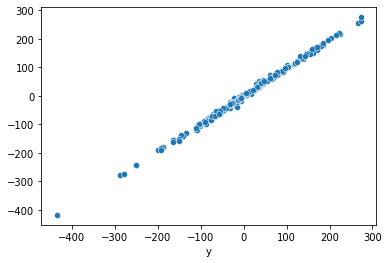

MSE:  24.521842072970053


In [57]:
sns.scatterplot(x= df.y, y = mdf.fittedvalues)
plt.show()
print("MSE: ", mse(df.y, mdf.fittedvalues))

<AxesSubplot:xlabel='f0', ylabel='y'>

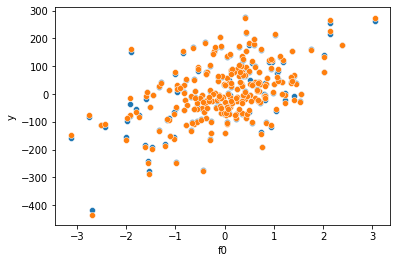

In [58]:
plt.show()
sns.scatterplot(x=df.f0, y=mdf.fittedvalues)
sns.scatterplot(x=df.f0, y=df.y)


<AxesSubplot:ylabel='y'>

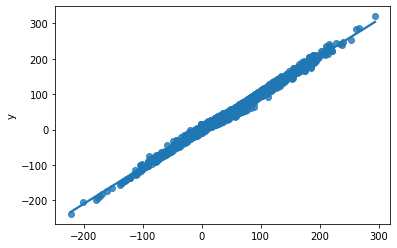

In [36]:
sns.regplot(x=mdf.fittedvalues, y=df.y)